<a href="https://colab.research.google.com/github/nahidkawsar/Chest_X_ray_Pneumonia_Detection_with_VGG16_Transfer_Learning/blob/main/Chest_X_ray_Pneumonia_Detection_with_VGG16_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:25<00:00, 133MB/s]
100% 2.29G/2.29G [00:25<00:00, 98.3MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r') #Now copy the path from the 3 dot of the zip file from the left side of the
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/train',
    labels='inferred',
    label_mode = 'int',#For which cats will get 0 and dogs will 1
    batch_size=32,
    image_size=(150,150))
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/train',
    labels='inferred',
    label_mode = 'int',#For which cats will get 0 and dogs will 1
    batch_size=32,
    image_size=(150,150)
)

Found 5216 files belonging to 2 classes.
Found 5216 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tensorflow.cast(image/255. ,tensorflow.float32)
  return image,label

In [ ]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit( #For data augmentation use model.fit_generator rather than model.fit
                    train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
163/163 [==============================] - 102s 532ms/step - loss: 0.1843 - accuracy: 0.9316 - val_loss: 0.0624 - val_accuracy: 0.9804
Epoch 2/10
163/163 [==============================] - 69s 416ms/step - loss: 0.0691 - accuracy: 0.9762 - val_loss: 0.0485 - val_accuracy: 0.9827
Epoch 3/10
163/163 [==============================] - 76s 458ms/step - loss: 0.0499 - accuracy: 0.9806 - val_loss: 0.0280 - val_accuracy: 0.9925
Epoch 4/10
163/163 [==============================] - 72s 432ms/step - loss: 0.0380 - accuracy: 0.9868 - val_loss: 0.0251 - val_accuracy: 0.9923
Epoch 5/10
163/163 [==============================] - 75s 452ms/step - loss: 0.0305 - accuracy: 0.9877 - val_loss: 0.0208 - val_accuracy: 0.9944
Epoch 6/10
163/163 [==============================] - 75s 451ms/step - loss: 0.0273 - accuracy: 0.9895 - val_loss: 0.0161 - val_accuracy: 0.9954
Epoch 7/10
163/163 [==============================] - 75s 453ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.0123 - val_a

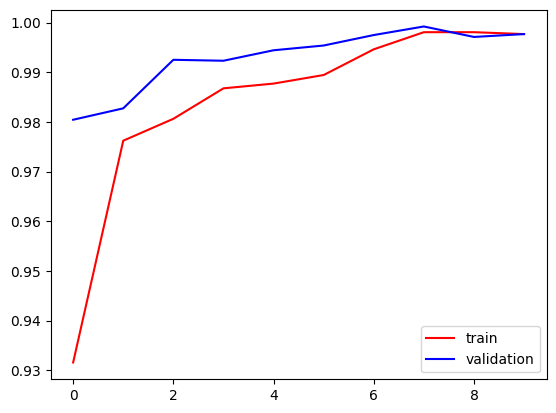

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


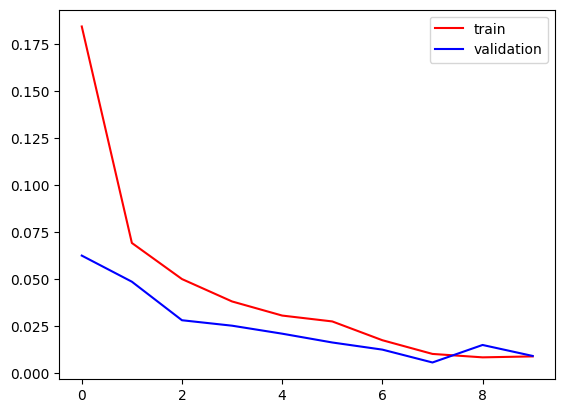

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()


In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')

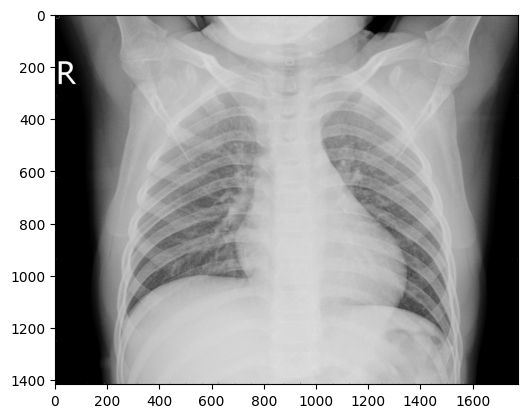

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_img = cv2.resize(test_img,(150,150))

In [ ]:
test_input = test_img.reshape((1,150, 150, 3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[0.]], dtype=float32)

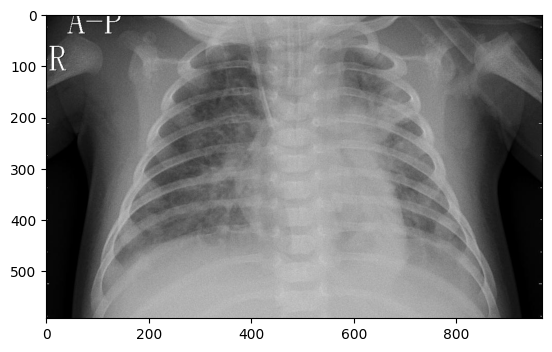

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.imread('/content/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')

In [ ]:
test_img.shape

(150, 150, 3)

In [ ]:
test_img = cv2.resize(test_img,(150,150))

In [ ]:
test_input = test_img.reshape((1,150,150,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 34ms/step


array([[1.]], dtype=float32)